# Practical 12 - Perform comparative sentiment analysis for Patanjali vs HUL using pre-downloaded tweet data.

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Load training and testing data
train_df = pd.read_csv('/content/Dataset - Train.csv')
test_df = pd.read_csv('/content/Dataset - Test.csv')

# Combine for full analysis
df = pd.concat([train_df, test_df], ignore_index=True)
print(df.columns)
print(df.head())


Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product', 'Tweet'],
      dtype='object')
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product Tweet  
0                                   Negative emotion   NaN  
1                                   Positive emotion   NaN  
2                                   Positive emotion   NaN  
3                                   Negative em

In [ ]:
df['brand'] = df['emotion_in_tweet_is_directed_at'].str.lower()
df['sentiment_raw'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.lower()

In [ ]:
def map_sentiment(text):
    if isinstance(text, str):
        text = text.lower()
        if 'positive' in text:
            return 'positive'
        elif 'negative' in text:
            return 'negative'
    return 'neutral'


In [ ]:
df['sentiment'] = df['sentiment_raw'].apply(map_sentiment)

In [ ]:
apple_df = df[df['brand'].str.contains('apple', na=False)]
android_df = df[df['brand'].str.contains('android', na=False)]

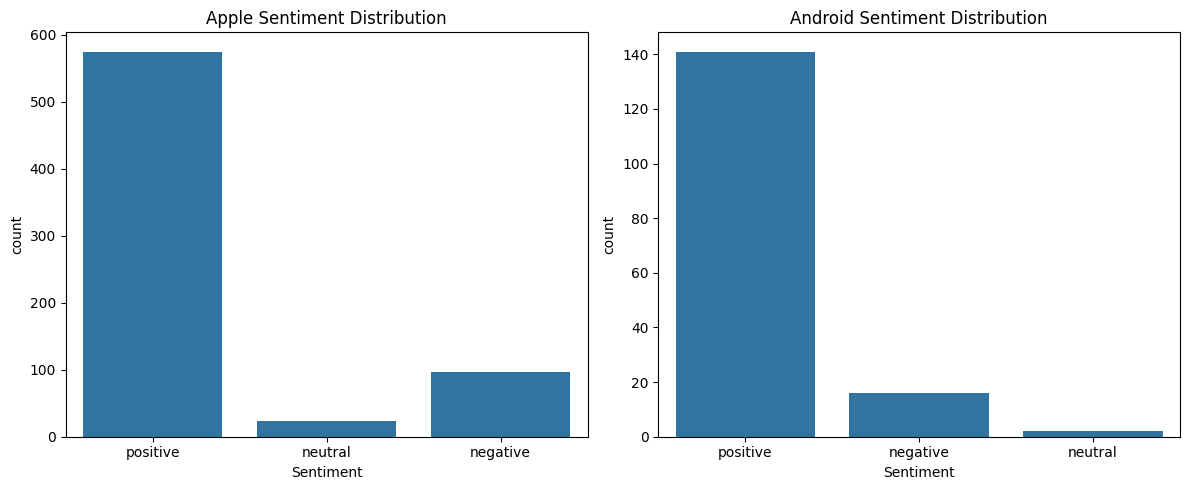

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=apple_df, x='sentiment', ax=axs[0])
axs[0].set_title('Apple Sentiment Distribution')
axs[0].set_xlabel('Sentiment')

sns.countplot(data=android_df, x='sentiment', ax=axs[1])
axs[1].set_title('Android Sentiment Distribution')
axs[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

In [ ]:
print("Apple Sentiment Breakdown:")
print(apple_df['sentiment'].value_counts(normalize=True))

print("\nAndroid Sentiment Breakdown:")
print(android_df['sentiment'].value_counts(normalize=True))

Apple Sentiment Breakdown:
sentiment
positive    0.826149
negative    0.139368
neutral     0.034483
Name: proportion, dtype: float64

Android Sentiment Breakdown:
sentiment
positive    0.886792
negative    0.100629
neutral     0.012579
Name: proportion, dtype: float64


# Using Twitter API